<a href="https://colab.research.google.com/github/kholoudAlharbi/masar/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**PART 1: A Dataset for Predicting Used Car Prices**

#**Introduction**


**A Dataset for Predicting Used Car Prices**

**By : Kholoud Obaid Alharbi**



**Objective:**

In today's automotive market, the demand for used cars is steadily increasing, driven by factors such as affordability, depreciation rates, and a wide range of available options. Predicting the prices of used cars accurately is crucial for both buyers and sellers to make informed decisions. This necessitates the analysis of comprehensive datasets containing various attributes related to used cars.


**Attributes:**

**car_name:** The name of the car.

**registration_year:** The year of registration for the car.

**insurance_validity:** The validity of insurance for the car.

**fuel_type:** The type of fuel used in the car.

**seats:** The number of seats in the car.

**kms_driven:** The number of kilometers driven by the car.

**ownership:** The type of ownership for the car.

**transmission:** The type of transmission for the car (manual or automatic).

**manufacturing_year:** The year of manufacturing for the car.

**mileage(kmpl):** The average number of kilometers that can be covered per liter of fuel (for front-wheel drive cars).

**engine(cc):** The engine capacity of the car.

**max_power(bhp):** The maximum power of the engine in brake horsepower (bhp).

**torque(Nm):** The torque of the engine in Newton meters (Nm).

**price(in lakhs):** The price of the car in lakhs.







#**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#**Load Dataset**

In [ ]:
csv_file_path = '/content/Used Car Dataset.csv'

In [ ]:
df = pd.read_csv(csv_file_path)

#**Data Exploration**

In [ ]:
df.head().style.set_properties(**{'background-color' : '#d8bfd8',
                                    'color' : 'black',
                                    'border-color': '#90ee100'})

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.810000,2996.000000,2996.000000,333.000000,63.750000
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.400000,999.000000,999.000000,9863.000000,8.990000
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.680000,1995.000000,1995.000000,188.000000,23.750000
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.500000,1353.000000,1353.000000,13808.000000,13.560000
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.670000,1798.000000,1798.000000,17746.000000,24.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1553 non-null   int64  
 1   car_name            1553 non-null   object 
 2   registration_year   1553 non-null   object 
 3   insurance_validity  1553 non-null   object 
 4   fuel_type           1553 non-null   object 
 5   seats               1553 non-null   int64  
 6   kms_driven          1553 non-null   int64  
 7   ownsership          1553 non-null   object 
 8   transmission        1553 non-null   object 
 9   manufacturing_year  1553 non-null   object 
 10  mileage(kmpl)       1550 non-null   float64
 11  engine(cc)          1550 non-null   float64
 12  max_power(bhp)      1550 non-null   float64
 13  torque(Nm)          1549 non-null   float64
 14  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 182.1+

In [ ]:
df.columns

Index(['Unnamed: 0', 'car_name', 'registration_year', 'insurance_validity',
       'fuel_type', 'seats', 'kms_driven', 'ownsership', 'transmission',
       'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)', 'price(in lakhs)'],
      dtype='object')

In [ ]:
df.shape

(1553, 15)

#**Data Cleaning**






In [ ]:
#missing_values
df.isnull().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
dtype: int64

In [ ]:
#missing_percentage
(df.isnull().sum() / len(df)) * 100

Unnamed: 0            0.000000
car_name              0.000000
registration_year     0.000000
insurance_validity    0.000000
fuel_type             0.000000
seats                 0.000000
kms_driven            0.000000
ownsership            0.000000
transmission          0.000000
manufacturing_year    0.000000
mileage(kmpl)         0.193175
engine(cc)            0.193175
max_power(bhp)        0.193175
torque(Nm)            0.257566
price(in lakhs)       0.000000
dtype: float64

In [ ]:
display(df.shape)
print('-='* 8)

#changing the name to easier typing
df.rename(columns = {'mileage(kmpl)' : 'mileage',
                       'engine(cc)' : 'engine',
                       'max_power(bhp)' : 'max_power',
                       'torque(Nm)' : 'torque',
                       'price(in lakhs)' : 'price',
                      'ownsership' : 'ownership'}, inplace = True)


#checking null values
na = np.array(df.isnull().sum().tolist())
print("null values: ",na.sum())
print('-='* 8)


for cols in df.columns:
    if df[cols].isnull().sum() >= 1:
        print(f'{cols} = {df[cols].isnull().sum()},')

(1553, 15)

-=-=-=-=-=-=-=-=
null values:  13
-=-=-=-=-=-=-=-=
mileage = 3,
engine = 3,
max_power = 3,
torque = 4,


In [ ]:
#Droping Missing Data
df.dropna(inplace=True)
display(df.shape) #only 4 values in difference

(1549, 15)

In [ ]:
df.isnull().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownership             0
transmission          0
manufacturing_year    0
mileage               0
engine                0
max_power             0
torque                0
price                 0
dtype: int64

In [ ]:
# duplicated rows
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1548    False
1549    False
1550    False
1551    False
1552    False
Length: 1549, dtype: bool

#**Data Preprocessing**

In [ ]:
display(df.insurance_validity.unique())
print('-=' * 30)
display(df.ownership.unique())
print('-=' * 30)
display(df.fuel_type.unique())
print('-=' * 30)
display(df.transmission.unique())

array(['Comprehensive', 'Third Party insurance', 'Zero Dep',
       'Third Party', 'Petrol', 'Not Available'], dtype=object)

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


array(['First Owner', 'Second Owner', 'Third Owner', '2993 cc', '1461 cc',
       '998 cc', '1995 cc', '1451 cc', '1998 cc', '1498 cc', '1497 cc',
       '1996 cc', '1950 cc', '2013', 'Fifth Owner', '1199 cc', '1248 cc',
       '999 cc', '1197 cc', '1984 cc', '2999 cc', '1968 cc'], dtype=object)

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


array(['Petrol', 'Diesel', 'CNG', '5 Seats'], dtype=object)

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


array(['Automatic', 'Manual', '2017', '2014', '2023', '2020', '2021',
       '2011', '2022', 'Power Windows Front', '2018', '2015', '2016'],
      dtype=object)

In [ ]:
df = df.loc[(df.ownership == 'First Owner')  |
                (df.ownership == 'Second Owner') |
                (df.ownership == 'Third Owner')]

In [ ]:
df_num = df.copy()

df_num['insurance_validity'] = df.insurance_validity.replace({'Comprehensive' : 1,
                                                                  'Third Party insurance' : 3,
                                                                  'Zero Dep' : 2,
                                                                  'Third Party' : 3
                                                                   })

df_num['fuel_type'] = df.fuel_type.replace({'Petrol' : 1,
                                                'Diesel' : 2,
                                                'CNG' : 3
                                               })

df_num['ownership'] = df.ownership.replace({'First Owner' : 1,
                                                'Second Owner': 2,
                                                'Third Owner' : 3
                                               })

df_num['transmission'] = df.transmission.replace({'Manual' : 1,
                                                   'Automatic' : 2
                                                    })

In [ ]:
df_num.head().style.set_properties(**{'background-color' : '#d8bfd8',
                                    'color' : 'blACK',
                                    'border-color': '#90ee90'})

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownership,transmission,manufacturing_year,mileage,engine,max_power,torque,price
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,1,1,5,56000,1,2,2017,7.810000,2996.000000,2996.000000,333.000000,63.750000
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,1,1,5,30615,1,2,2020,17.400000,999.000000,999.000000,9863.000000,8.990000
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,1,2,5,24000,1,2,2018,20.680000,1995.000000,1995.000000,188.000000,23.750000
3,3,2019 Kia Seltos GTX Plus,Dec-19,1,1,5,18378,1,1,2019,16.500000,1353.000000,1353.000000,13808.000000,13.560000
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,1,1,5,44900,1,2,2019,14.670000,1798.000000,1798.000000,17746.000000,24.000000


In [ ]:
df_num.drop(columns = ['car_name', 'registration_year'], inplace = True)

df_num_cols = df_num.columns

for c in df_num_cols:
    df_num[c] = df_num[c].astype('float')

In [ ]:
import plotly.express as px

In [ ]:
outliers_test_cols = ['kms_driven', 'manufacturing_year', 'mileage', 'engine', 'torque', 'price']

fig = px.box(df_num ,y = outliers_test_cols, log_y = True, title = 'Plot to show wrong values in data preprocessing')

color_dict = {'outliers': 'lightgreen'}

fig.update_traces(boxpoints="outliers", marker=dict(color=color_dict['outliers']))
fig.update_layout(plot_bgcolor = '#d8bfd8')
fig.update_yaxes(title = 'Values in logarithmic order')

In [ ]:
df_num['price'] = df_num['price'].apply(lambda x: x/1000 if x > 1000 else x)


In [ ]:
df_num['engine'] = df_num['engine'].apply(lambda x: x/100000000 if x > 1000000000000
                                              else(x/100000 if x > 1000000000 and x < 1000000000000
                                              else x))

In [ ]:
df_num['torque'] = df_num['torque'].apply(lambda x: x/100 if x > 800000 else x)

In [ ]:
#statistical summary of the numerical columns in the DataFrame
df.describe()

,Unnamed: 0,seats,kms_driven,mileage,engine,max_power,torque,price
count,1497.000000,1497.000000,1497.000000,1497.000000,1.497000e+03,1.497000e+03,1.497000e+03,1497.000000
mean,782.888444,5.206413,53166.785571,187.521383,1.523967e+10,1.523967e+10,1.275507e+04,171.724182
std,448.300885,0.637099,40405.132510,516.901914,2.223830e+11,2.223830e+11,8.274628e+04,3543.246170
min,0.000000,4.000000,620.000000,7.810000,6.700000e+01,6.700000e+01,1.900000e+01,1.000000
25%,401.000000,5.000000,30000.000000,16.100000,1.197000e+03,1.197000e+03,5.000000e+02,4.630000
50%,790.000000,5.000000,49404.000000,18.760000,1.493000e+03,1.493000e+03,1.176000e+03,6.950000
75%,1169.000000,5.000000,70000.000000,21.400000,1.995000e+03,1.995000e+03,8.850000e+03,16.000000
max,1552.000000,8.000000,810000.000000,3996.000000,3.258640e+12,3.258640e+12,1.186600e+06,95000.000000


In [ ]:
correlation_matrix = df.corr()

<ipython-input-32-68bbfff3c4eb>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
correlation_matrix

,Unnamed: 0,seats,kms_driven,mileage,engine,max_power,torque,price
Unnamed: 0,1.000000,-0.059827,0.042432,-0.010440,0.004740,0.004740,0.045115,-0.016359
seats,-0.059827,1.000000,0.047603,0.091711,0.193023,0.193023,-0.023585,-0.013612
kms_driven,0.042432,0.047603,1.000000,-0.094675,-0.042461,-0.042461,0.036398,0.003683
mileage,-0.010440,0.091711,-0.094675,1.000000,0.363169,0.363169,-0.046791,0.045848
engine,0.004740,0.193023,-0.042461,0.363169,1.000000,1.000000,-0.009990,-0.003301
max_power,0.004740,0.193023,-0.042461,0.363169,1.000000,1.000000,-0.009990,-0.003301
torque,0.045115,-0.023585,0.036398,-0.046791,-0.009990,-0.009990,1.000000,-0.006811
price,-0.016359,-0.013612,0.003683,0.045848,-0.003301,-0.003301,-0.006811,1.000000


#**Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


**This code draws a heatmap using the Seaborn library in Python. The heatmap is used to visualize the correlation matrix between different variables in a dataset. This visualization includes a table-like panel with colored cells representing the strength of correlation between different pairs of variables**

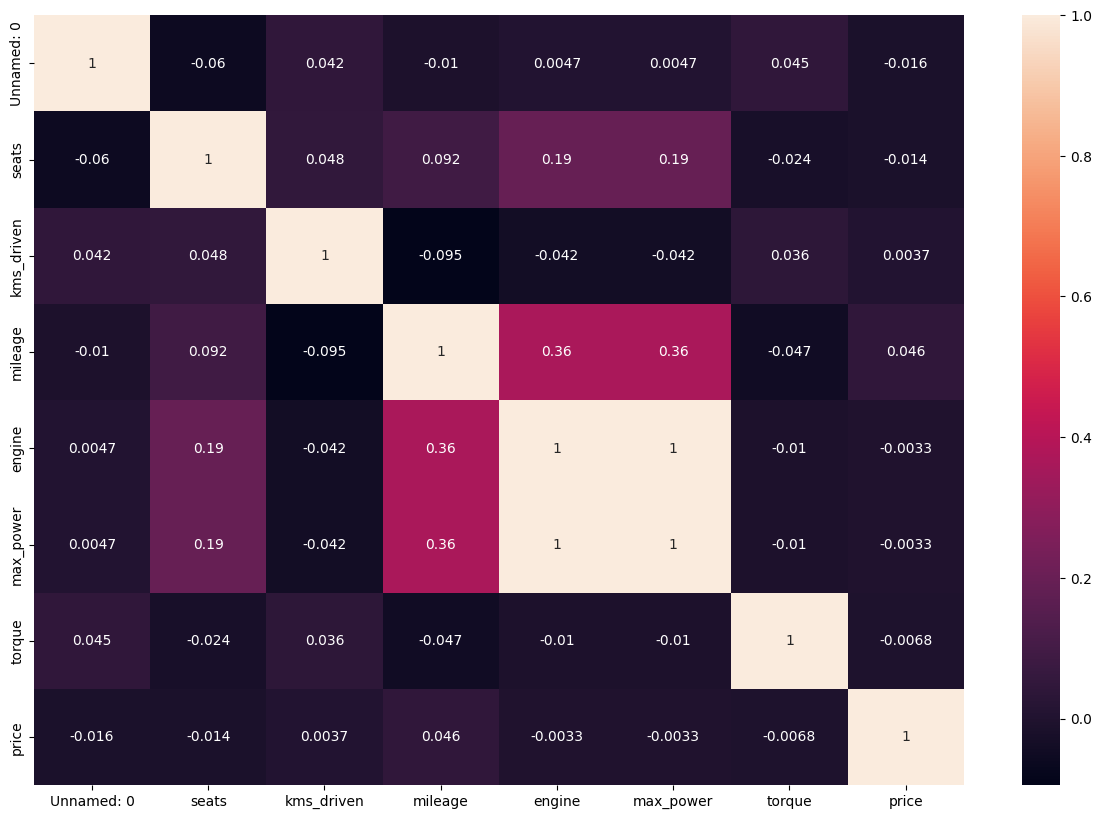

In [ ]:
# prompt: heatmap

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [ ]:
fuel_type_counts=df.groupby(['fuel_type'])['fuel_type'].count()

In [ ]:
fuel_type_counts

fuel_type
CNG        22
Diesel    480
Petrol    995
Name: fuel_type, dtype: int64

**This code generates a pie chart using the matplotlib library in Python. It visualizes the distribution of car fuel types (fuel_type) in the dataset. The sizes of the sectors in the pie chart are determined by the number of occurrences of each fuel type. The chart includes labels for each sector indicating the fuel type and the percentage of the total count represented by each sector.**

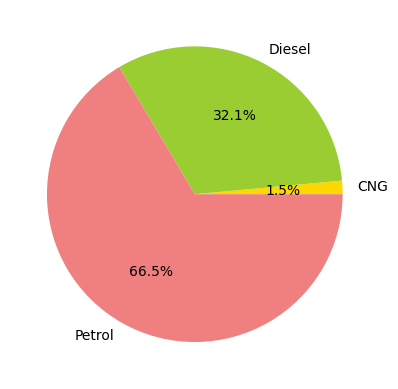

In [ ]:
labels = fuel_type_counts.index
sizes = fuel_type_counts.values
colors = ['gold', 'yellowgreen', 'lightcoral', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

**This code uses the matplotlib library in Python to create a scatter plot showing the relationship between the manufacturing year of a car (manufacturing_year) and its mileage in kilometers per liter (mileage(kmpl)). The scatter plot illustrates how cars are distributed across different years with respect to the mileage in kilometers per liter**

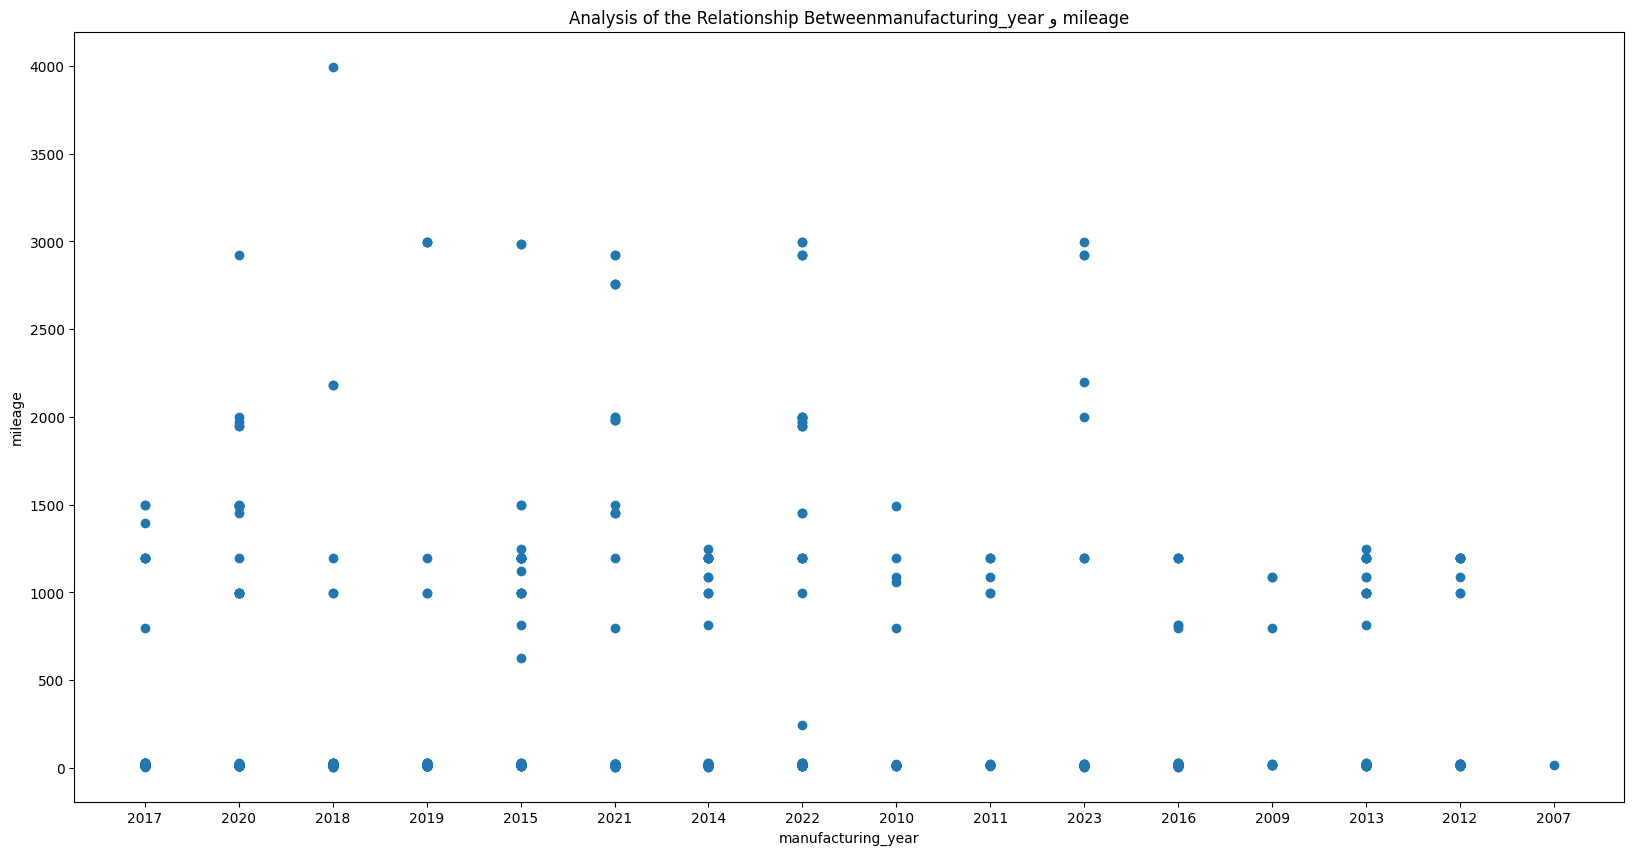

In [ ]:

column1 = 'manufacturing_year'
column2 = 'mileage'

plt.figure(figsize=(20,10))
plt.scatter(df[column1], df[column2])
plt.xlabel(column1)
plt.ylabel(column2)
plt.title('Analysis of the Relationship Between' + column1 + ' و ' + column2)
plt.show()

**This code creates a scatter plot using the seaborn library in Python, which visualizes the relationship between the registration year of cars (registration_year) and their prices in lakhs (price(in lakhs)). The plot illustrates how the prices of cars vary with their registration years. The x-axis represents the registration year, while the y-axis represents the price in lakhs. Each point in the scatter plot represents a car in the dataset**

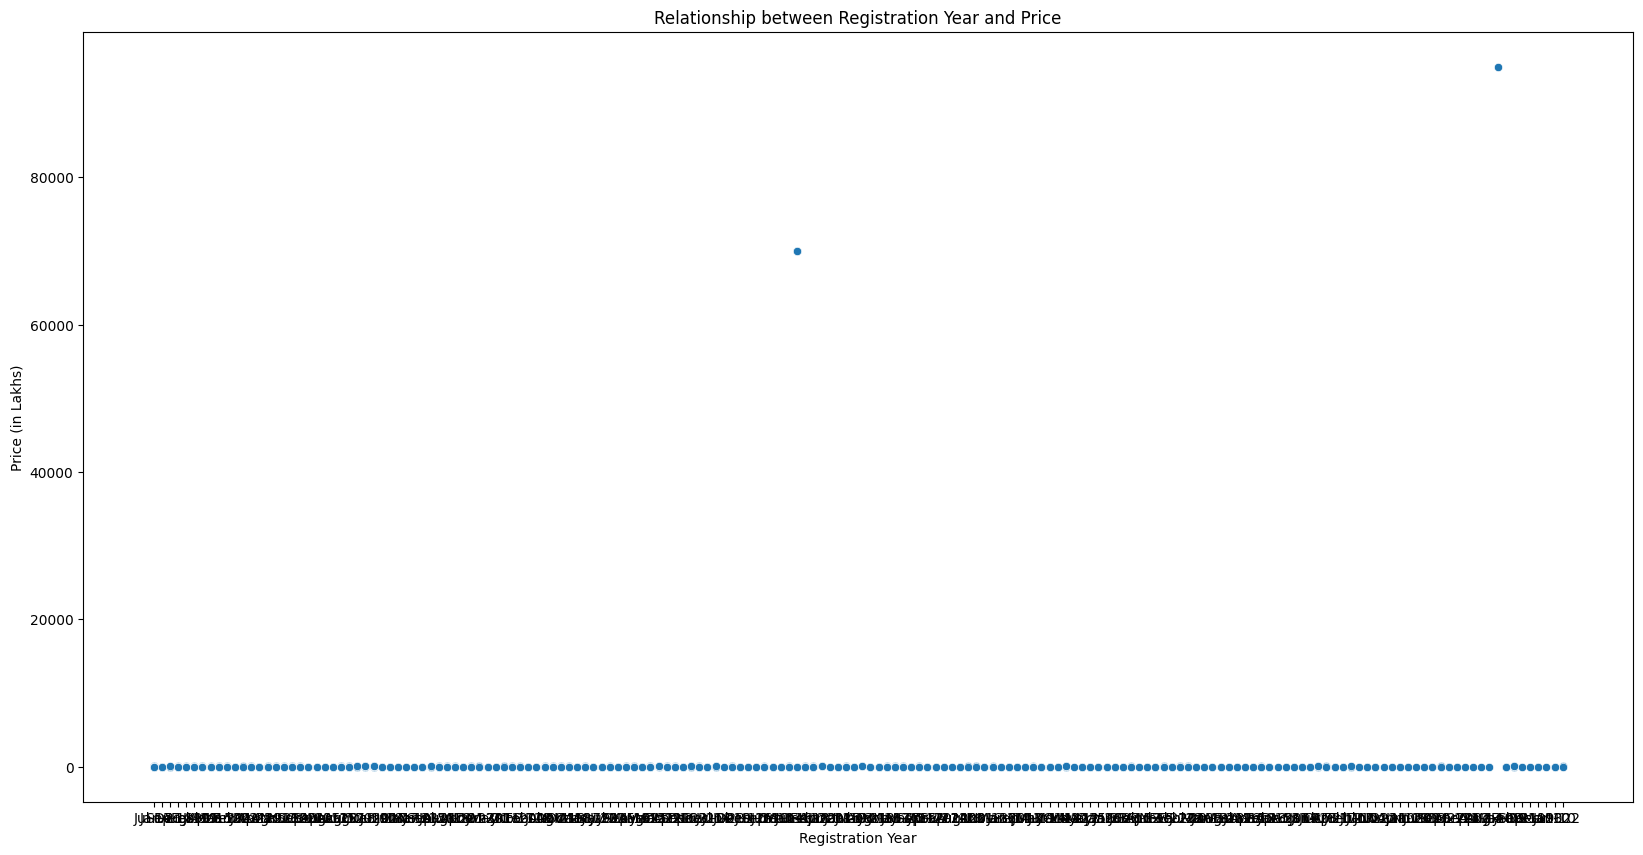

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x='registration_year', y='price')
plt.title('Relationship between Registration Year and Price')
plt.xlabel('Registration Year')
plt.ylabel('Price (in Lakhs)')
plt.show()

**This code displays the number of cars by fuel type in the dataset. This is achieved by counting the number of cars belonging to each fuel type using value_counts() on the fuel_type column. Then, this count is used to plot a bar chart using plt.bar(), where the fuel types are placed on the x-axis and the number of cars on the y-axis. The bar chart shows the quantity of cars belonging to each fuel type.**

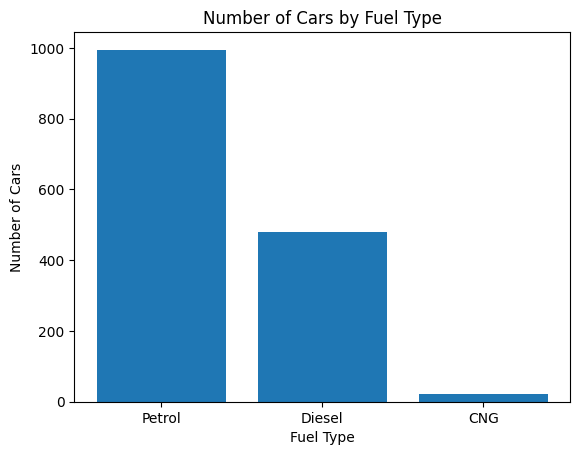

In [ ]:
fuel_counts = df['fuel_type'].value_counts()

plt.bar(fuel_counts.index, fuel_counts.values)
plt.title('Number of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.show()

**This code creates a histogram using the matplotlib library in Python. The histogram represents the distribution of kilometers driven by cars in the dataset. It achieves this by dividing the range of values into equal intervals (bins) and displaying the number of cars that fall into each interval. The title of the histogram indicates the nature of the data being analyzed, while the x-axis represents the kilometers driven and the y-axis represents the frequency or number of cars in each interval.**

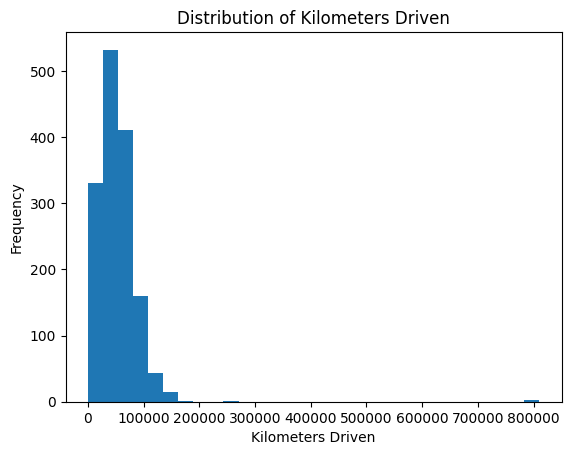

In [ ]:
plt.hist(df['kms_driven'], bins=30)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

**This code generates pair plots using the Seaborn library in Python. Pair plots are a grid of pairwise scatterplots showing the relationship between different variables in a dataset.**

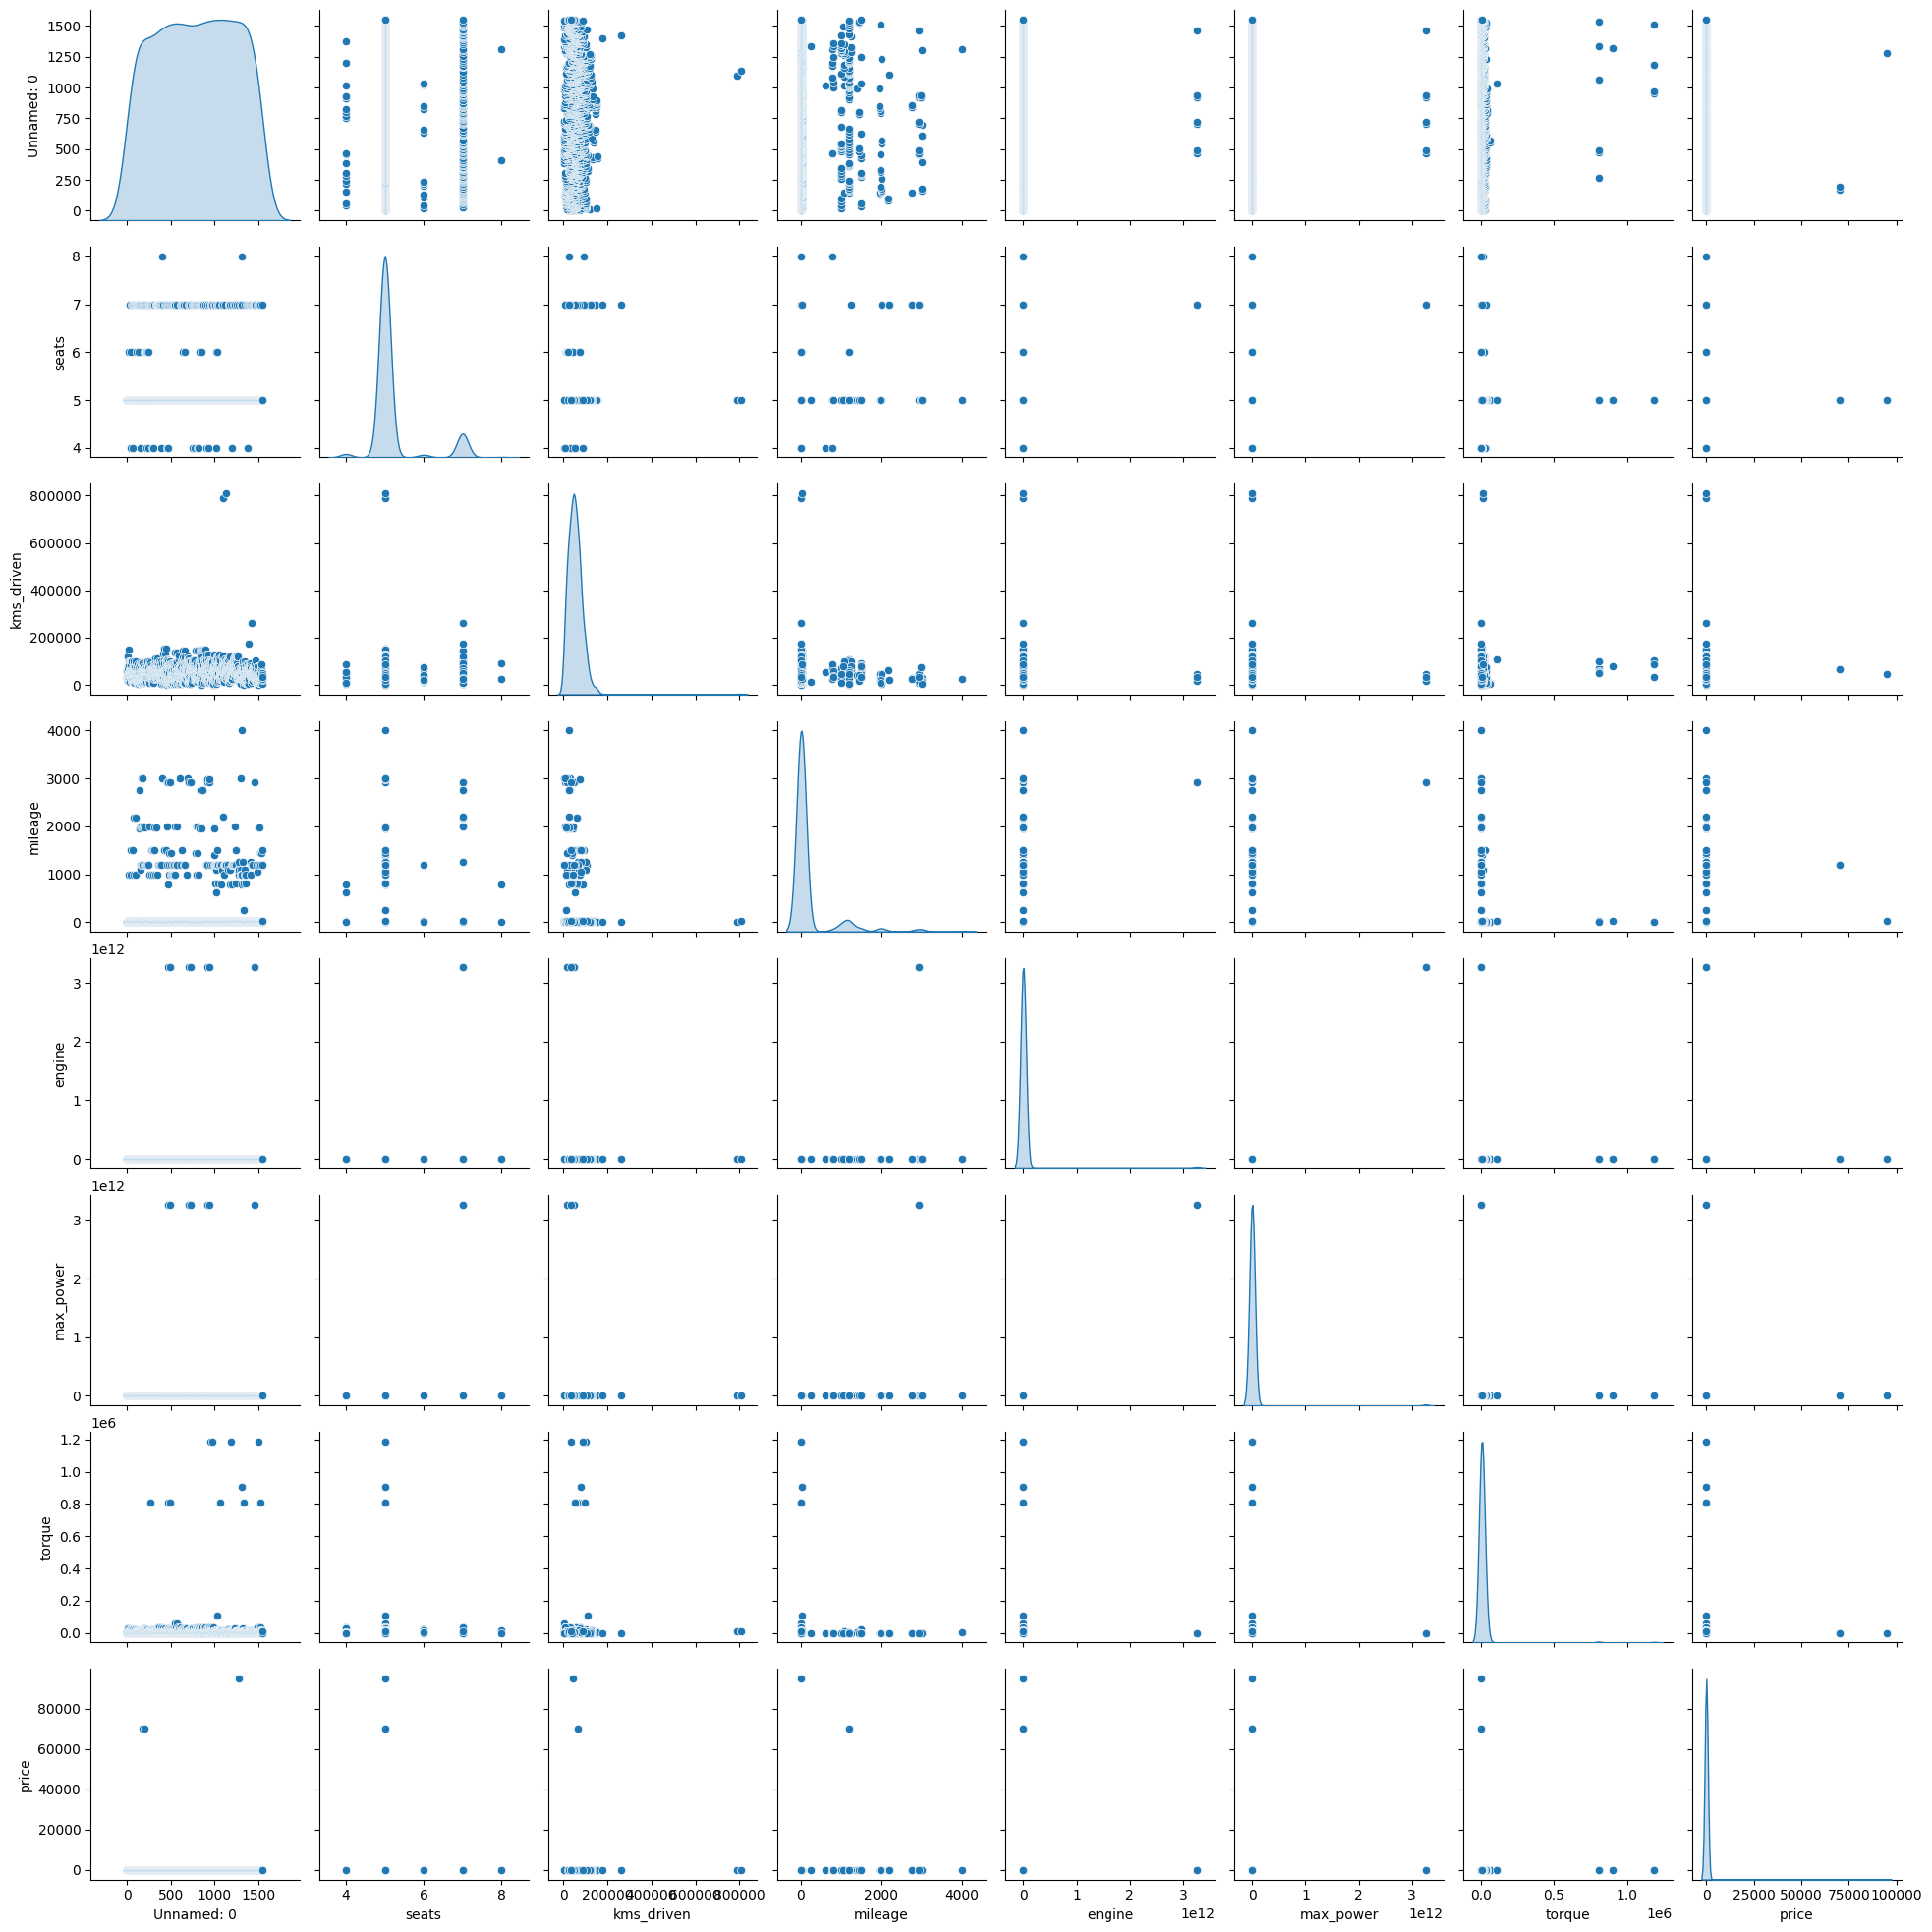

In [ ]:
# prompt: pairplots

sns.pairplot(df, diag_kind='kde')
plt.show()


#**LM model**

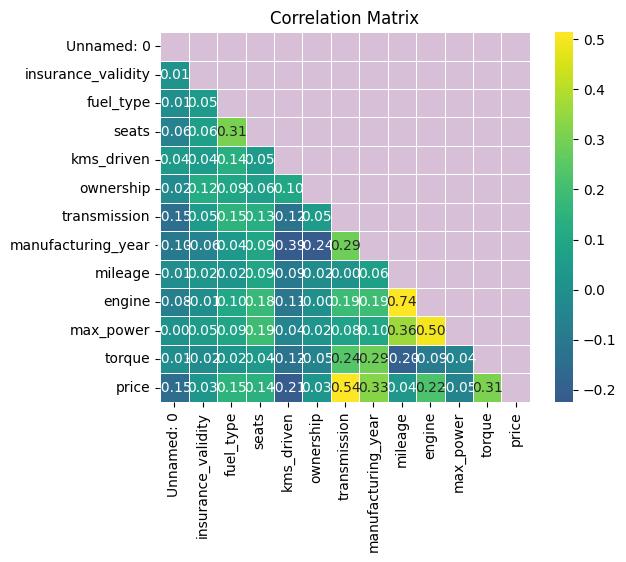

In [ ]:
price_corr = df_num.corr(numeric_only = True)

mask = np.triu(np.ones_like(price_corr))

fig = sns.heatmap(price_corr, mask=mask, robust=True, center=0, square=True, cmap="viridis", linewidths=0.6, annot=True, fmt=".2f")
plt.title('Correlation Matrix')

fig.set_facecolor('#d8bfd8')
plt.show()

In [ ]:
outliers_test_cols = ['kms_driven', 'manufacturing_year', 'mileage', 'engine', 'torque', 'price']

fig = px.box(df_num ,y = outliers_test_cols, log_y = True, title = 'Plot for non-categorical columns')

color_dict = {'outliers': 'darkgreen'}

fig.update_traces(boxpoints="outliers", marker=dict(color=color_dict['outliers']))
fig.update_layout(plot_bgcolor = '#d8bfd8')

In [ ]:
X = df_num.iloc[ : ,0:10]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = df_num.loc[ : ,'price'].values

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import plotly.graph_objects as go
from plotly.subplots import make_subplots

model_LR = sm.OLS(y, sm.add_constant(X)).fit()

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows = 1, cols = 2)

t0 = go.Scatter(x = model_LR.predict(), y = model_LR.resid, mode='markers')
t1 = go.Box(y = model_LR.resid)

fig.update_layout(plot_bgcolor = '#d8bfd8')
fig.append_trace(t0, 1, 1)
fig.append_trace(t1, 1, 2)

fig.data[0].marker.color = 'green'
fig.data[1].marker.color = 'lightgreen'

fig.update_xaxes(title_text = "Predictions", row=1, col=1)
fig.update_yaxes(title_text = "Residuals", row=1, col=1)

fig.update_xaxes(title_text = "X", row=1, col=2)
fig.update_yaxes(title_text = "Residuals", row=1, col=2)

fig.show()

In [ ]:
_, p_value, _, _ = sms.het_breuschpagan(resid = model_LR.resid, exog_het = model_LR.model.exog)
print('p_value: ', p_value)

if p_value > 0.05:
    print('validated')
elif p_value <= 0.05:
    print('not validated')

p_value:  1.9649010883201757e-37
not validated


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, model_LR.predict())

8.914378599145135

#**Decision Tree**

In [ ]:
df_num.head(3).style.set_properties(**{'background-color' : '#d8bfd8',
                                        'color' : 'darkgreen',
                                        'border-color': '#90ee90'})

,Unnamed: 0,insurance_validity,fuel_type,seats,kms_driven,ownership,transmission,manufacturing_year,mileage,engine,max_power,torque,price
0,0.000000,1.000000,1.000000,5.000000,56000.000000,1.000000,2.000000,2017.000000,7.810000,2996.000000,2996.000000,333.000000,63.750000
1,1.000000,1.000000,1.000000,5.000000,30615.000000,1.000000,2.000000,2020.000000,17.400000,999.000000,999.000000,9863.000000,8.990000
2,2.000000,1.000000,2.000000,5.000000,24000.000000,1.000000,2.000000,2018.000000,20.680000,1995.000000,1995.000000,188.000000,23.750000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X = df_num.iloc[ : ,0:10].values
y = df_num.iloc[ : , 10].values

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.33, random_state = 0)


for mln in [100,175,250,500]:
    model_tree = DecisionTreeRegressor(max_leaf_nodes = mln, random_state = 0).fit(train_X, train_y)

    pred = model_tree.predict(test_X)
    resid = test_y - pred

    print(f'MAE for {mln} leaf nodes: ',mean_absolute_error(test_y, pred))

MAE for 100 leaf nodes:  3337827.0936198803
MAE for 175 leaf nodes:  3337827.0626262627
MAE for 250 leaf nodes:  3337827.0626262627
MAE for 500 leaf nodes:  3337827.0626262627


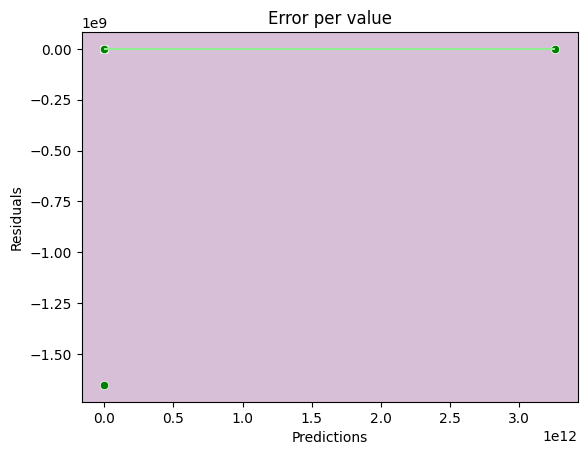

In [ ]:
fig = sns.scatterplot(y = resid, x = pred, color = 'green')
plt.hlines(y = 0 , xmin = min(pred), xmax = max(pred), color = 'lightgreen')

plt.title('Error per value')
plt.ylabel('Residuals')
plt.xlabel('Predictions');

fig.set_facecolor('#d8bfd8')

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
nb_samples = 1000
x, y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
print(accuracy_score(ytest, model.predict(xtest)))

0.965


In [ ]:
from sklearn.tree import DecisionTreeClassifier
nb_samples = 1000
x, y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)


DecisionTreeClassifier()

In [ ]:
print(accuracy_score(ytest, model.predict(xtest)))

0.76


#**PART 2: Coding in Python**

In [ ]:
print(accuracy_score(ytest, model.predict(xtest)))

0.865


1. Loop:
Question:
Write a Python program that uses a 'for' loop to print all even numbers from 1 to 10. Then, use 'while' loop.

In [ ]:
# Using a for loop
print("Using a for loop:")
for num in range(1, 11):
    if num % 2 == 0:
        print(num)

# Using a while loop
print("\nUsing a while loop:")
num = 1
while num <= 10:
    if num % 2 == 0:
        print(num)
    num += 1

Using a for loop:
2
4
6
8
10

Using a while loop:
2
4
6
8
10


2. Control Flows:
Question:
Create a Python function named grade_classifier that takes a student's score as an argument and returns a string indicating their grade. Use the following criteria:

Score >= 90: "A"
80 <= Score < 90: "B"
70 <= Score < 80: "C"
60 <= Score < 70: "D"
Score < 60: "F"


In [ ]:
def grade_classifier(score):
    if score >= 90:
        return "A"
    elif score >= 80:
        return "B"
    elif score >= 70:
        return "C"
    elif score >= 60:
        return "D"
    else:
        return "F"

# Example usage:
student_score = 85
print(f"The student's grade is: {grade_classifier(student_score)}")


The student's grade is: B


3. If Conditions:
Question:
Write a Python program that prompts the user to enter their age. Use if-elif-else statements to categorize and print the user's age group as follows:

If the age is less than 13, print "Child."
If the age is between 13 and 19 (inclusive), print "Teenager."
If the age is between 20 and 59 (inclusive), print "Adult."
If the age is 60 or older, print "Senior Citizen."


In [ ]:
# Prompting the user to enter their age
age = int(input("Please enter your age: "))

# Categorizing and printing the age group
if age < 13:
    print("Child.")
elif 13 <= age <= 19:
    print("Teenager.")
elif 20 <= age <= 59:
    print("Adult.")
else:
    print("Senior Citizen.")

Please enter your age: 30
Adult.


In [ ]:
# Define the function multiply_numbers
def multiply_numbers(num1, num2):
    """
    Function to multiply two numbers.

    Parameters:
    - num1: The first number (integer or float).
    - num2: The second number (integer or float).

    Returns:
    - The product of num1 and num2.
    """
    return num1 * num2

# Test the function with values 5 and 7
result = multiply_numbers(5, 7)
print("Result of multiplying 5 and 7:", result)

Result of multiplying 5 and 7: 35


5.
Write a Python program that does the following:

Prompts the user to enter a number (user_num).
Uses a loop to print all numbers from 1 to user_num (inclusive) that are divisible by 3.


In [ ]:
# Prompt the user to enter a number
user_num = int(input("Enter a number: "))

# Use a loop to print numbers divisible by 3
print(f"Numbers from 1 to {user_num} that are divisible by 3:")
for num in range(1, user_num + 1):
    if num % 3 == 0:
        print(num)

Enter a number: 15
Numbers from 1 to 15 that are divisible by 3:
3
6
9
12
15
